<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/SVM_ALGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2022-10-03 08:18:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2022-10-03 08:18:49 (182 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [4]:
df=pd.read_csv('cell_samples.csv')

In [5]:
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.shape

(699, 11)

In [7]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [17]:

df=df[pd.to_numeric( df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')


data preprocessing 
as we can see types int for all except  except BareNuc so will convert in to int

In [15]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

data visulization (non linear sort)

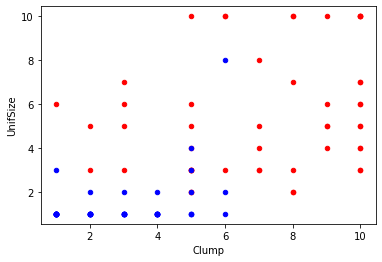

In [35]:
ax=df[df['Class']==4][0:50].plot(kind='scatter', x='Clump', y='UnifSize',color='r')
df[df['Class']==2][0:50].plot(kind='scatter', x='Clump',y='UnifSize',color='b',ax=ax)
plt.show()

exctracting x AND Y FOR TRAINING MODEL

In [48]:
feature_df=df[['Clump',	'UnifSize',	'UnifShape',	'MargAdh',	'SingEpiSize',	'BareNuc',	'BlandChrom',	'NormNucl',	'Mit']]
x=np.asanyarray(feature_df)

In [49]:
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [50]:
y=np.asanyarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [51]:
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(546, 9)
(546,)
(137, 9)
(137,)


Modeling (SVM with Scikit-learn)

In [53]:
model=svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [57]:
y_pred=model.predict(x_test)
y_pred[0:5]

array([2, 2, 4, 2, 2])

In [41]:
r2_score(y_test, y_pred)

0.8075842696629214

In [76]:
confusion_matrix(y_test,y_pred,labels=[2,4])


array([[90,  2],
       [ 1, 44]])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        45

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



1.Linear
 2.Polynomial 
 3.Radial basis function (RBF) 
 4.Sigmoid

In [79]:
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)

In [80]:
r2_score(y_test,y_pred1)

0.8345410628019324

In [81]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        92
           4       0.95      0.93      0.94        45

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [83]:
confusion_matrix(y_test, y_pred1,labels=[2,4])

array([[90,  2],
       [ 3, 42]])

In [99]:
model=svm.SVC( kernel='poly', degree=2)
model.fit(x_train, y_train)
y_pred2=model.predict(x_test)

In [100]:
r2_score(y_test, y_pred2)

0.9007246376811594

In [101]:
confusion_matrix(y_test,y_pred2, labels=[2,4])

array([[90,  2],
       [ 1, 44]])

In [103]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        45

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

